## Exploratory Data Analysis on Titanic Dataset

#### Step 1: Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load Dataset

In [41]:
df = pd.read_csv("D:/Titanic.csv")

#### Step 3: Basic Understanding

In [45]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.shape

(891, 12)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
df.value_counts()

PassengerId  Survived  Pclass  Name                                      Sex     Age   SibSp  Parch  Ticket      Fare    Embarked
1            0         3       Braund, Mr. Owen Harris                   male    22.0  1      0      A/5 21171   7.250   S           1
599          0         3       Boulos, Mr. Hanna                         male    28.0  0      0      2664        7.225   C           1
588          1         1       Frolicher-Stehli, Mr. Maxmillian          male    60.0  1      1      13567       79.200  C           1
589          0         3       Gilinski, Mr. Eliezer                     male    22.0  0      0      14973       8.050   S           1
590          0         3       Murdlin, Mr. Joseph                       male    28.0  0      0      A./5. 3235  8.050   S           1
                                                                                                                                    ..
301          1         3       Kelly, Miss. Anna Katherine "

#### Step 4: Data Cleaning - Handling Missing Values

##### 1. For numerical columns - fill with median

In [58]:
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\asmit\AppData\Local\Temp\ipykernel_24800\1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


##### 2. For categorical columns - fill with mode

In [79]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\asmit\AppData\Local\Temp\ipykernel_24800\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


##### 3. Drop 'Cabin' due to too many missing values

In [82]:
df.drop('Cabin', axis=1, inplace=True)

##### 4. Value Counts for Categorical Columns

In [89]:
cat_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for Survived:
Survived
0    549
1    342
Name: count, dtype: int64

Value counts for Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Value counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Value counts for Embarked:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


#### Step 5: Data types check again

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### Step 6: Feature Engineering

##### 1. Adding family size column

In [98]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

##### 2. Adding IsAlone column

In [103]:
df['IsAlone'] = 1
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0

##### 3. Creating an AgeGroup based on Age 

In [108]:
def age_group(age):
    if age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Teenager'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senoir'

In [110]:
df['AgeGroup'] = df['Age'].apply(age_group)

#### Step 7: Visualizations

##### 1. Correlation Heatmap

##### Select only numeric columns for correlation and pairplot

In [126]:
numeric_cols = df.select_dtypes(include=[np.number])

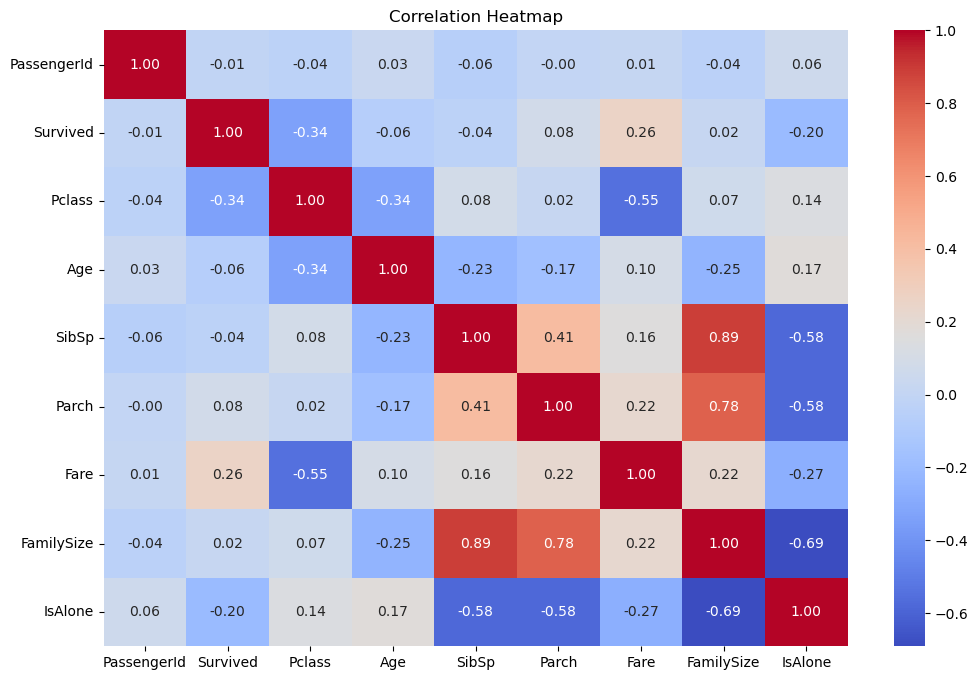

In [124]:
plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### Strong correlation between Pclass and Fare, moderate negative correlation between Pclass and Survived.

##### 2.Pairplot

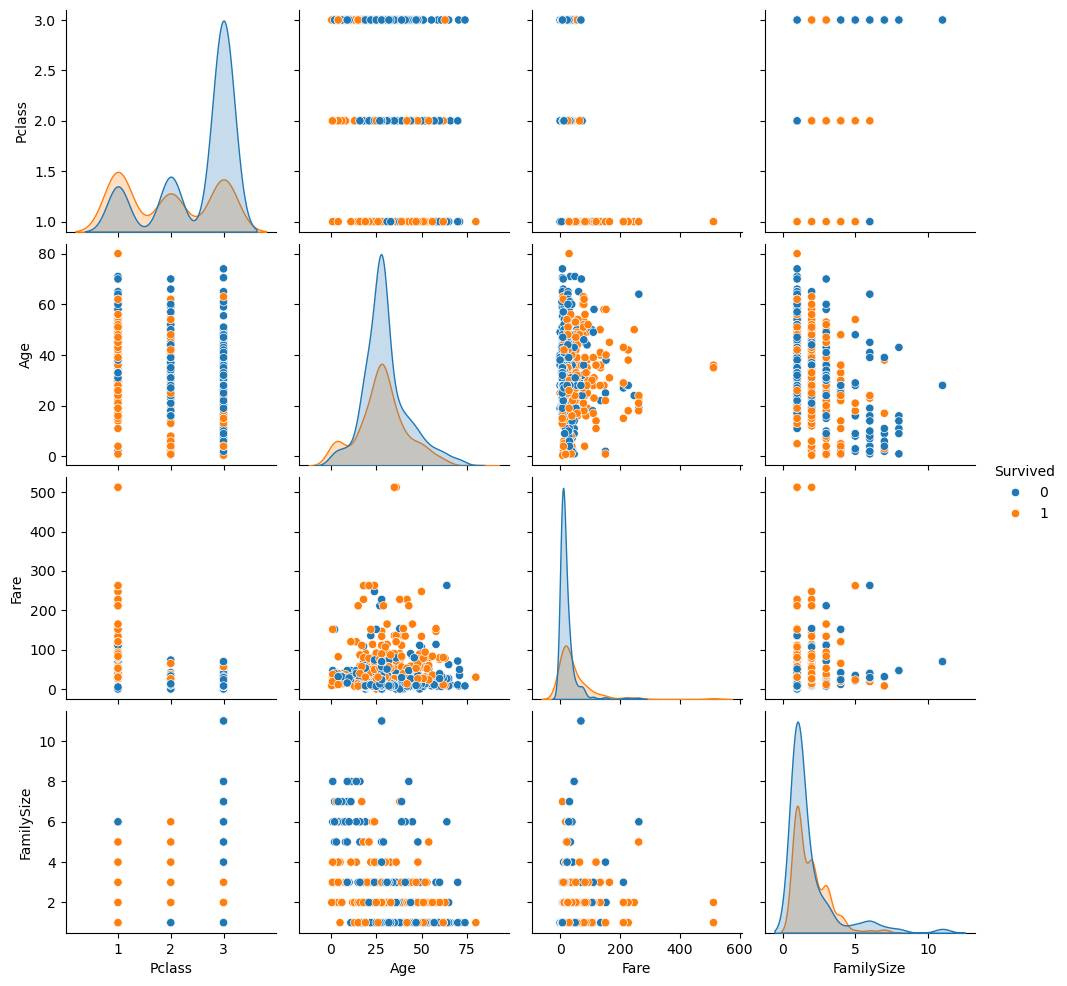

In [135]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']], hue='Survived', diag_kind='kde')
plt.show()

##### Lower class (Pclass=3) passengers had lower survival, higher fares are associated with survival.

##### 3. Histogram of Age

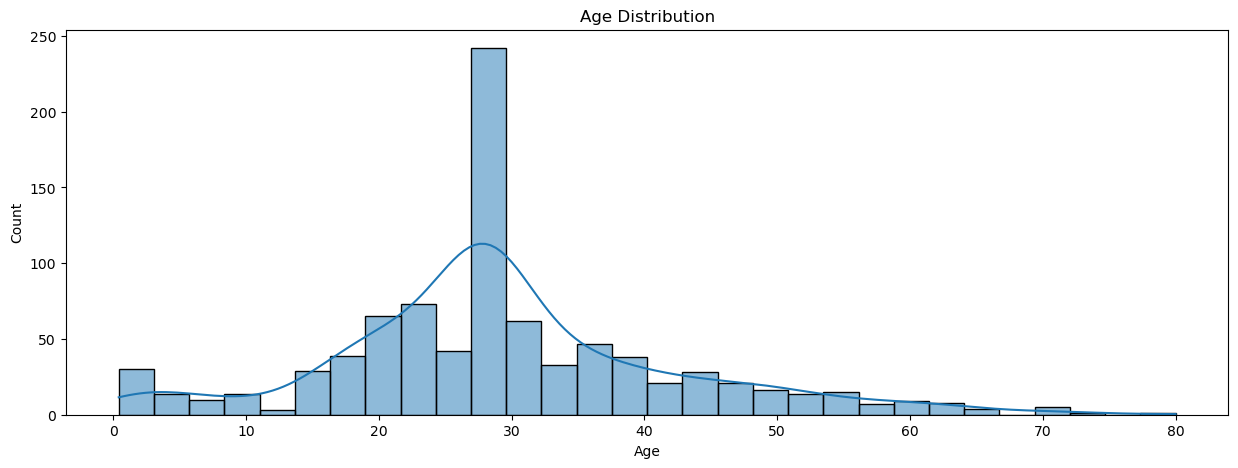

In [154]:
plt.figure(figsize=(15,5))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

##### Most passengers are adults (20-40 years old).

##### 5. Boxplot for Fare

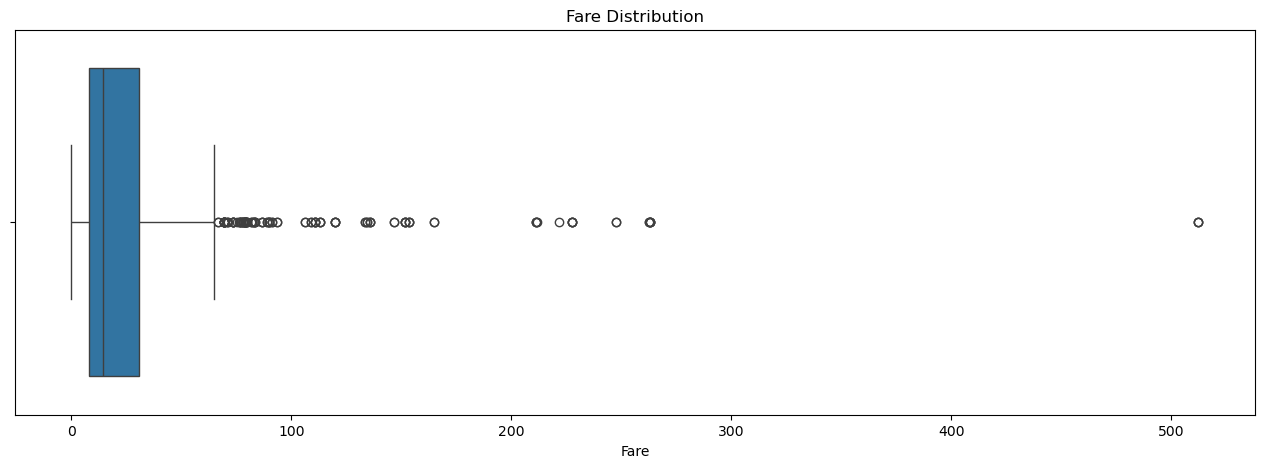

In [152]:
plt.figure(figsize=(16,5))
sns.boxplot(x=df['Fare'])
plt.title('Fare Distribution')
plt.show()

##### Presence of many outliers, some passengers paid extremely high fares.

##### 6. Countplot for Sex vs Survival

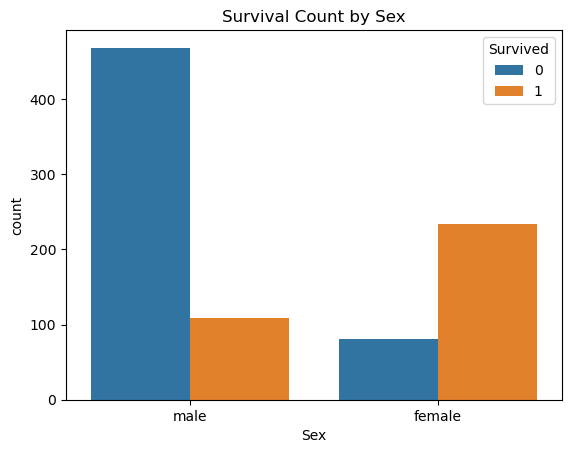

In [159]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()

##### Female passengers survived much more often than males.

##### 7. Countplot for Pclass vs Survival

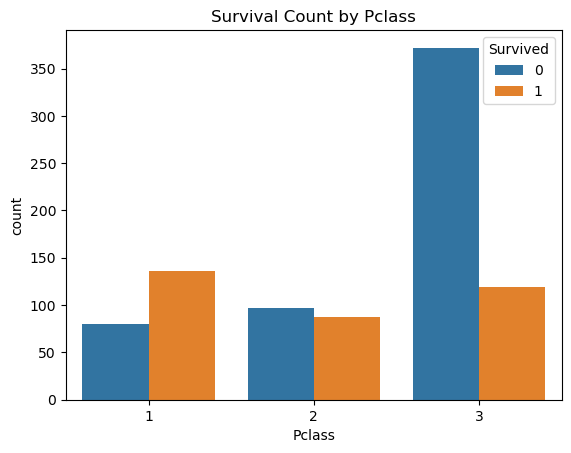

In [164]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Pclass')
plt.show()

##### First class passengers had much higher survival rates.

##### 8. Barplot for IsAlone vs Survival

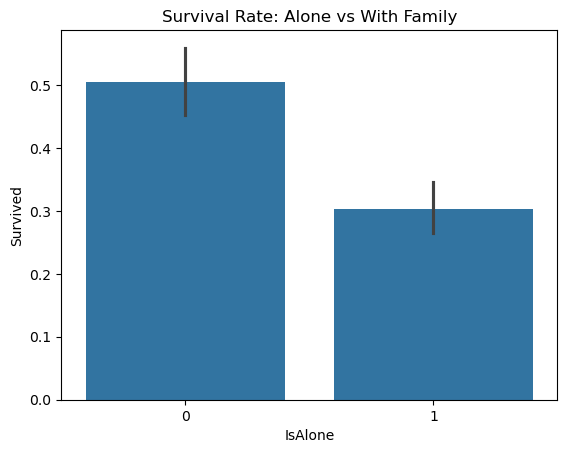

In [168]:
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title('Survival Rate: Alone vs With Family')
plt.show()

##### Passengers traveling alone had lower survival rates.

##### 9.Barplot for AgeGroup vs Survival

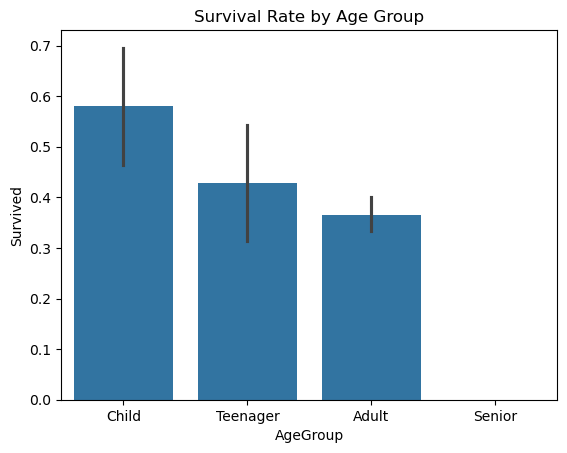

In [172]:
sns.barplot(x='AgeGroup', y='Survived', data=df, order=['Child', 'Teenager', 'Adult', 'Senior'])
plt.title('Survival Rate by Age Group')
plt.show()

##### Children had a significantly higher survival rate.

##### 10. Feature Distribution

In [192]:
num_cols = ['AgeGroup']

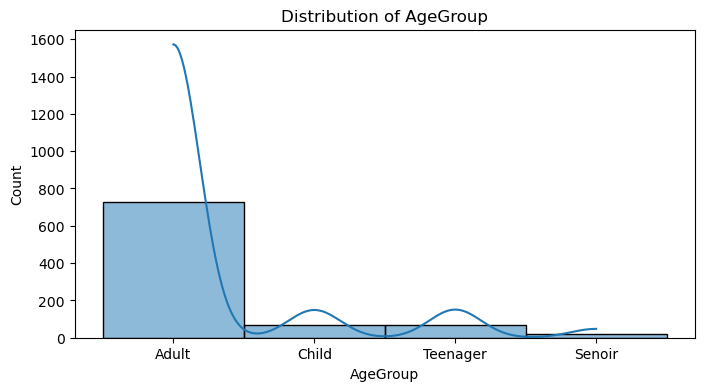

In [194]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

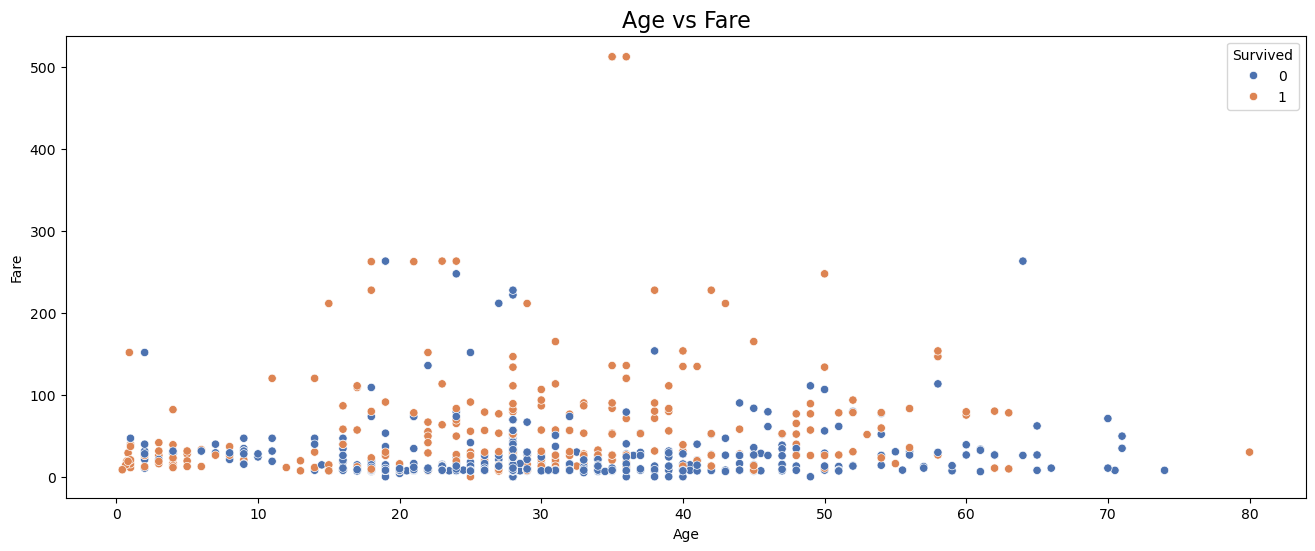

In [223]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='deep')
plt.title('Age vs Fare', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()

##### Passengers who paid higher fares (above $100) had higher survival.
##### Very young and very old passengers appear across fare ranges.

#### Step 8: Insights Summary

📋 Final EDA Insights Summary:
1. Female passengers had a higher survival rate than males.
2. Passengers in 1st class survived more often compared to 2nd and 3rd class.
3. Children (age <= 12) had better survival chances than adults and seniors.
4. Higher Fare is associated with higher survival rate.
5. Passengers traveling with family (FamilySize > 1) survived more.
6. Passengers traveling alone had lower survival rates.
7. Embarked port also influenced survival — Cherbourg had higher survival.